In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_file_path = '/content/drive/MyDrive/mnist_dataset.csv'

In [ ]:
#Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib

#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression

#Softmax Function

In [ ]:
def softmax(z):
  """Compute softmax probabilities for a given input matrix."""
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)
#Test case for softmax
z_test  = np.array([[2.0, 1.0, 0.1],[1.0, 1.0 , 1.0]])
softmax_output = softmax(z_test)
row_sums = np.sum(softmax_output, axis=1)
assert np.allclose(row_sums,1),f"Test failed:Row sums are {row_sums}"
print("softmax_function passed the test case!")





softmax_function passed the test case!


# Prediction Function

In [ ]:
def predict_softmax(X,W,b):
  """Predict class labels using trained softmax model."""
  z = np.dot(X,W)+b
  probs = softmax(z)
  predicted_classes =  np.argmax(probs,axis=1)
  return predicted_classes


#Test case for prediction

In [ ]:
x_test = np.array([[0.2,0.8],[0.5,0.5],[0.9,0.1]])
w_test = np.array([[0.4,0.2,0.1],[0.3,0.7,0.5]])
b_test = np.array([0.1,0.2,0.3])
y_pred_test = predict_softmax(x_test,w_test,b_test)
assert y_pred_test.shape == (3,),f"Test failed :Expected shape (3,),  got {y_pred_test.shape}"
print("Predicted class labels:",y_pred_test)


Predicted class labels: [1 1 0]


#Implementation of Loss and cost Function

#Loss Function

In [ ]:
def loss_softmax(y_pred,y):
  """Compute cross-entropy loss for a batch of samples."""
  y_pred = np.clip(y_pred,1e-15) #Avoid log(0)
  loss = -np.sum(y*np.log(y_pred)) /y.shape[0]
  return loss

#Test case for loss function

In [ ]:
import numpy as np

# Define the cost function for softmax
def cost_softmax(X, y, W, b):
    logits = np.dot(X, W) + b
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Avoid numerical instability
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    loss = -np.sum(y * np.log(softmax_probs + 1e-9)) / X.shape[0]  # Adding small value to prevent log(0)
    return loss

X_correct =np.array([[1.0 ,0.0],[0.0, 1.0]])
y_correct = np.array([[1,0],[0,1]])
W_correct = np.array([[1.0, 0.0],[0.0, 1.0]])
b_correct = np.array([0.1, 0.1])
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])
y_incorrect = np.array([[1, 0], [0, 1]])
W_incorrect = np.array([[0.1, 0.9], [1.5, 0.3]])
b_incorrect = np.array([0.5, 0.6])
cost_correct =  cost_softmax(X_correct, y_correct, W_correct, b_correct)
cost_incorrect =  cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
assert cost_incorrect > cost_correct, f"Test failed: {cost_incorrect} <={cost_correct}"
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect )
print("Test passed!")

Cost for correct prediction: 0.3132616861503434
Cost for incorrect prediction: 0.40761542794954697
Test passed!


# Implementation of Gradient Descent Algorithm

## Compute Gradients

In [ ]:
def compute_gradient_softmax(x,y,w,b):
  """compute gradients of the cost function w.r.t. weights and biases."""
  z = np.dot(x,w)+b
  y_pred = softmax(z)
  error = y_pred - y
  grad_w = np.dot(x.T,error)/x.shape[0]
  grad_b = np.sum(error,axis=0)/x.shape[0]
  return grad_w,grad_b

#Test case for compute_gradient_softmax


In [ ]:
x_test = np.array([[0.2, 0.8],[0.5, 0.5],[0.9,0.1]])
y_test =np.array([[1,0,0],[0,1,0],[0,0,1]])
w_test = np.array([[0.4,0.2,0.1],[0.3,0.7,0.5]])
b_test = np.array([0.1,0.2,0.3])
grad_W,grad_b = compute_gradient_softmax(x_test,y_test,w_test,b_test)
z_test = np.dot(x_test,w_test)+b_test
y_pred_test = softmax(z_test)
grad_W_manual = np.dot(x_test.T,y_pred_test-y_test)/x_test.shape[0]
grad_b_manual = np.sum(y_pred_test-y_test,axis=0)/x_test.shape[0]
assert np.allclose(grad_W,grad_W_manual),"Test failed: Gradients w.r.t.W mismatch"
assert np.allclose(grad_b,grad_b_manual),"Test failed: Gradients w.r.t.W mismatch"
print("Gradient w.r.t.W:", grad_W)
print("Gradient w.r.t.b:", grad_b)
print("Test passed!")


Gradient w.r.t.W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t.b: [-0.03290036  0.02484708  0.00805328]
Test passed!


#Gradient Descent

In [ ]:
def gradient_decent_softmax(X,y,W,b,alpha,n_iter,show_cost=False):
  """Perform gradient descent to optimize weights and biases."""
  cost_history = []
  for i in range(n_iter):
    grad_W,grad_b = compute_gradient_softmax(X,y,W,b)
    W -= alpha*grad_W
    b -= alpha*grad_b
    cost = cost_softmax(X,y,W,b)
    cost_history.append(cost)
    if show_cost and i%100==0:
      print(f"Cost at iteration {i}: {cost}")

  return W,b,cost_history

#Preparing the Dataset

In [ ]:
def load_and_prepare_mnist(csv_file ,test_size=0.2,random_state=42):
  """Load MNIST CSV from  Google Drive,split into/test, and plot sample."""
  df= pd.read_csv(csv_file)
  y = df.iloc[:, 0].values
  X = df.iloc[:, 1:].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  plot_sample_images(X,y)
  return X_train, X_test, y_train, y_test

def plot_sample_images(X,y):
  """plot One sample image per digit(0-9)."""
  plt.figures(figsize=(10,4))
  unique_classes = np.unique(y)
  for i, digit in enumerate(unique_classes) :
      index = np.where(y == digit)[0][0]
      image = X[index].reshape(28,28)
      plt.subplot(2,5,i+1)
      plt.imshow(image,cmap='gray')
      plt.title(f"Digit: {digit}")
      plt.axis('off')
  plt.tight_layout()
  plt.show()




### Question 1: Is extracting pixel values sufficient for effective feature extraction?

In [ ]:
print("Question 1 Answer:")
print("Extracting pixel values alone may not always be sufficient for effective feature extraction.")
print("While it works well for MNIST due to its simplicity and standardized format (centered, normalized digits),")
print("real-world images often require more sophisticated features (e.g., edges, textures) via techniques like CNNs.")
print("For MNIST, raw pixels are adequate because the dataset is preprocessed, but additional features could improve robustness.")

Question 1 Answer:
Extracting pixel values alone may not always be sufficient for effective feature extraction.
While it works well for MNIST due to its simplicity and standardized format (centered, normalized digits),
real-world images often require more sophisticated features (e.g., edges, textures) via techniques like CNNs.
For MNIST, raw pixels are adequate because the dataset is preprocessed, but additional features could improve robustness.


#Training of the model

#Load and prepare data from Google Drive

In [ ]:
X_train, X_test, y_train, y_test = load_and_prepare_mnist("/content/drive/MyDrive/mnist_dataset.csv")

## One-hot encode labels

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))
y_test_encoded = encoder.transform(y_test.reshape(-1,1))

#Shape check

In [ ]:
assert len(X_train) == len(y_train),f"Error:X and y have different lengths! X = {len(X_train)},y ={len(y_train)}"
print("Move forward:Dimension of Feature Matrix X and lebel vector y matched.")

Move forward:Dimension of Feature Matrix X and lebel vector y matched.


#Initialize parameters

In [ ]:
d = X_train.shape[1]
c = y_train_encoded.shape[1]
W = np.random.randn(d,c)
b = np.zeros(c)
alpha = 0.1
n_iter = 1000

#Train the model

In [ ]:
W_opt, b_opt, cost_history = gradient_decent_softmax(X_train,y_train_encoded,W,b,alpha,n_iter,show_cost=True)


Cost at iteration 0: 4.282107465126639
Cost at iteration 100: 2.4633262816035115
Cost at iteration 200: 1.8126223790067622
Cost at iteration 300: 1.4920556602350963
Cost at iteration 400: 1.3015041127178546
Cost at iteration 500: 1.1742345315856806
Cost at iteration 600: 1.0825565163697966
Cost at iteration 700: 1.0129635860348531
Cost at iteration 800: 0.9580417857018282
Cost at iteration 900: 0.9133694812458484


#plot cost history

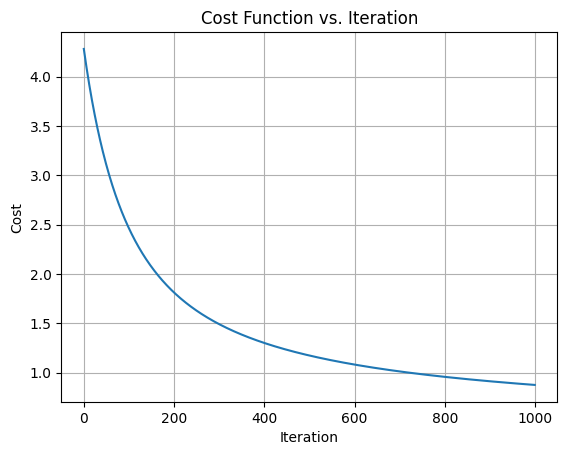

In [ ]:
plt.plot(cost_history)
plt.title('Cost Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid( True)
plt.show()

#Evaluating Models Performance

In [ ]:
def evaluate_classification(y_true,y_pred):
  """Evaluate performance using confustion matrix, precision , recall, and F1-score."""
  cm = confusion_matrix(y_true,y_pred)
  precision = precision_score(y_true,y_pred,average='weighted')
  recall = recall_score(y_true,y_pred,average='weighted')
  f1 = f1_score(y_true,y_pred,average='weighted')
  return cm, precision, recall,f1

#Predict and evaluate

In [ ]:
y_pred_test = predict_softmax(X_test, W_opt, b_opt)
y_test_labels = np.argmax(y_test_oh, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

#Print metrics

In [ ]:
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Confusion Matrix:
[[1041    0   18   17    5   51   21    7    9    6]
 [   1 1231   11   23    1    7    3    1   41    3]
 [  11   13  923   45   22    8   47   24   57   24]
 [  23   10   49  937    4   88    8   16   61   23]
 [   5    6   16   11  952   11   32   12   22  109]
 [  50   11   29   94   38  727   36    6   94   19]
 [  18   10   48    6   18   19 1026    1   29    2]
 [  11   29   21    9   21   11    0 1095    9   93]
 [  16   30   44   69   20   77   10    6  853   35]
 [   7   14   10   17  100   21    0   84   26  915]]
Precision: 0.81
Recall: 0.81
F1-score: 0.81


#Visualize Confusion Matrix

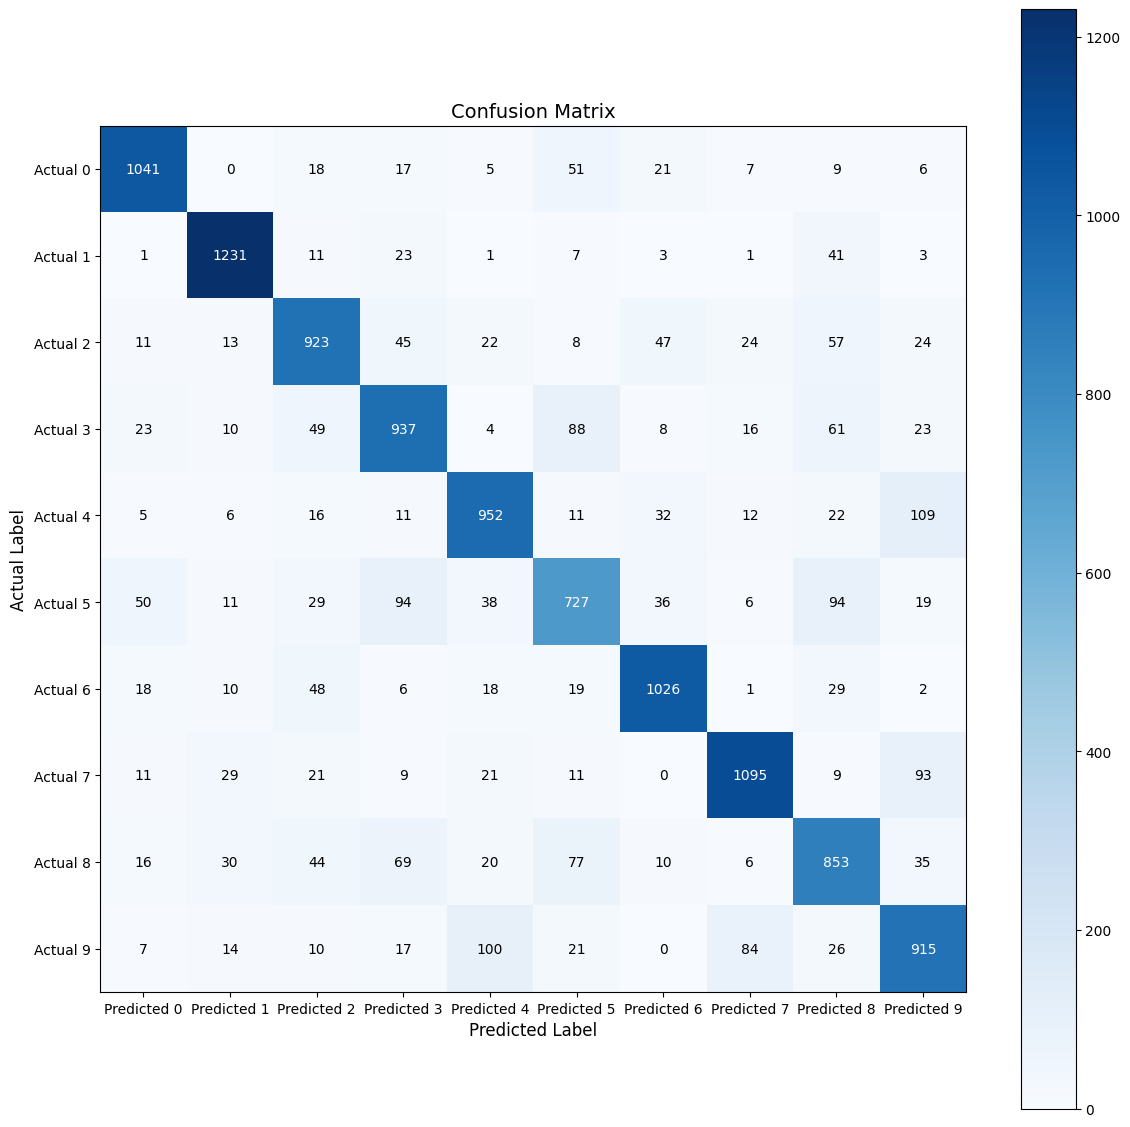

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))
cax = ax.imshow(cm,cmap='Blues')
num_classes = cm.shape[0]
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels ([f'Predicted {i}' for i in range (num_classes)])
ax.set_yticklabels ([f'Actual {i}' for i in range (num_classes)])
for i in range (num_classes):
  for j in range (num_classes):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='white' if cm[i,j] > cm.max()/2 else 'black')
ax.grid( False)
plt.title('Confusion Matrix',fontsize=14)
plt.xlabel('Predicted Label',fontsize=12)
plt.ylabel('Actual Label',fontsize=12)
plt.tight_layout()
plt.colorbar(cax)
plt.show()

# Exercise - Linear Separability and Logistic Regression
# Generate linearly separable dataset

In [ ]:
X_linear_seperate, y_linear_separable = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear_seperate, y_linear_separable, test_size=0.2, random_state=42)


#Train logistic regression

In [ ]:
logistc_model_linear_seperate = LogisticRegression()
logistc_model_linear_seperate.fit(X_train_linear,y_train_linear)

LogisticRegression()

#Generate non -linearly separable dataset

In [ ]:
X_non_linear_seperate, y_non_linear_separable = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(X_non_linear_seperate, y_non_linear_separable, test_size=0.2, random_state=42)


#Train logistic regression

In [ ]:
logistc_model_non_linear_seperate = LogisticRegression()
logistc_model_non_linear_seperate.fit(X_train_non_linear,y_train_non_linear)

LogisticRegression()

Plot decision boundaries

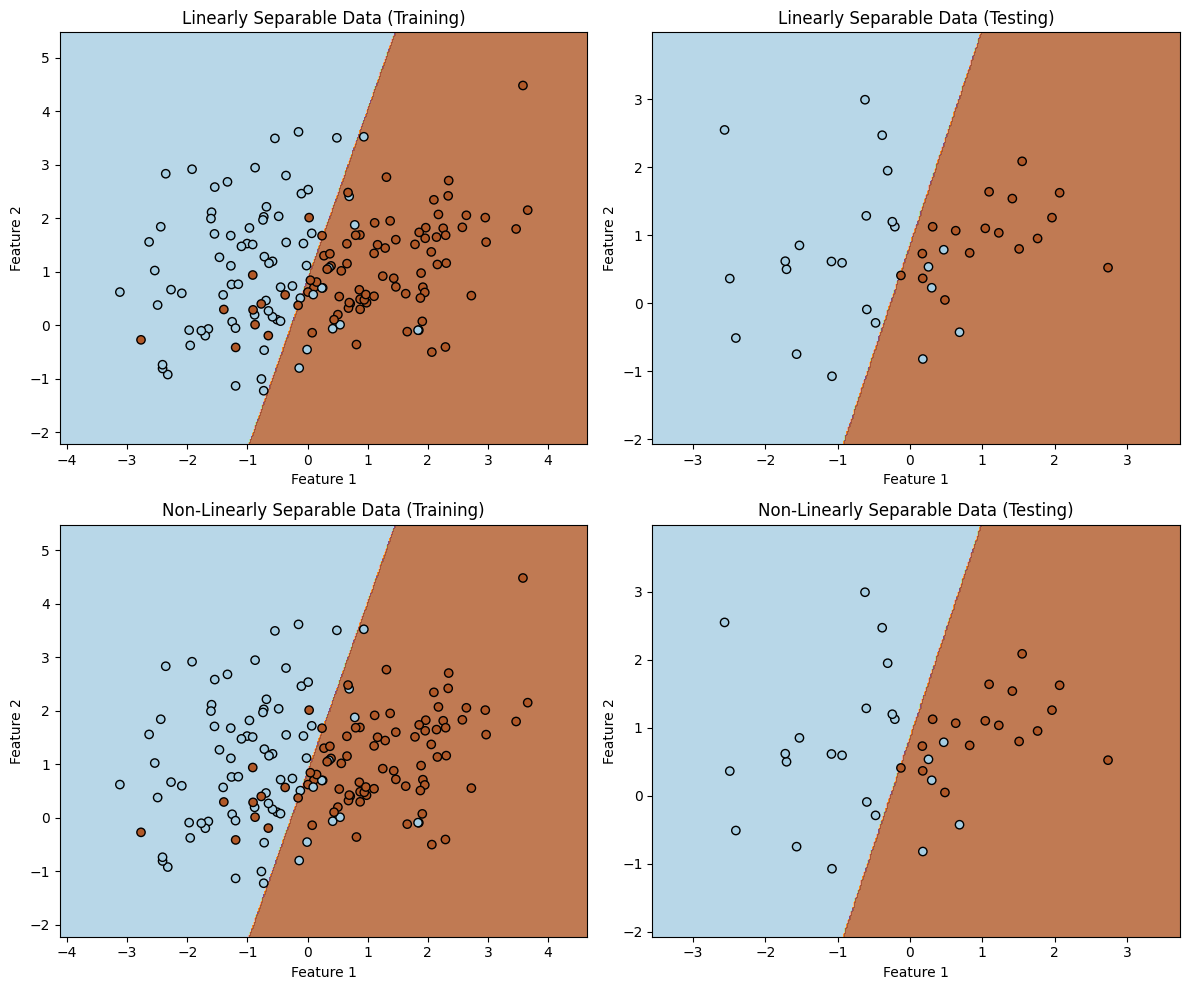

In [ ]:
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Corrected the variable name here to match the defined variable
plot_decision_boundary(axes[0, 0], logistc_model_linear_seperate, X_train_linear, y_train_linear, 'Linearly Separable Data (Training)')
plot_decision_boundary(axes[0, 1], logistc_model_linear_seperate, X_test_linear, y_test_linear, 'Linearly Separable Data (Testing)')
# Corrected the variable name here to match the defined variable
plot_decision_boundary(axes[1, 0], logistc_model_non_linear_seperate, X_train_non_linear, y_train_non_linear, 'Non-Linearly Separable Data (Training)')
# Corrected the variable name here to match the defined variable
plot_decision_boundary(axes[1, 1], logistc_model_non_linear_seperate, X_test_non_linear, y_test_non_linear, 'Non-Linearly Separable Data (Testing)')
plt.tight_layout()
plt.show()